## Medical Cost Prediction
>(Healthcare Domain)


## Business/Domain Understanding
### What is Insurance?
>Insurance is a contract between two parties whereby one party agrees to undertake the risk of the other in exchange for consideration known as premium and promises to indemnify the party on the happening of an uncertain event.
### What is health insurance?
>A plan that covers or shares the expenses associated with health care can be described as health insurance.

>Health insurance in India is an emerging insurance sector after the term life insurance and automobile insurance sector. Rise in the middle class, higher hospitalization cost, expensive health care, digitization and increase in awareness level are some important drivers for the growth of the health insurance market in India.



### Task
>How to split the given data into Train and Test?

>How to perform Data Preparation on -

>Categorical Columns - OneHotEncoding and LabelEncoding

>Numerical Columns - Standardization and Normalization

>How to build ML models that can predict medical costs billed by health insurance on an individual given some features about the individual in the dataset.


## Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step - 1: Load the data and perform the basic EDA to understand the data.
### Load the Data

In [2]:
Health_insurance=pd.read_csv(r'C:\Users\Irfan\Downloads\insurance.csv')
Health_insurance.drop(Health_insurance.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
Health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis
1.Univariate Analysis 

2.Bivariate Analysis 

3.Missing Values 

4.Outliers 

### Columns or Dimensions or Features or Properties
>age: age of primary beneficiary

>sex: insurance contractor gender, female, male

>bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective 
index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

>children: Number of dependents

>smoker: Smoking

>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

>charges: Individual medical costs billed by health insurance


In [4]:
Health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Health_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
Health_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Machine Learning Problem
>Build a system which can take features of Medical case(Health insurence) like age, sex, bmi, children, smoker, region and predicts the charges of Medical case(Health insurence).


>Target Variable:charges

## Numarical variables

In [7]:
num=Health_insurance.select_dtypes(include='number')
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Outliers detection

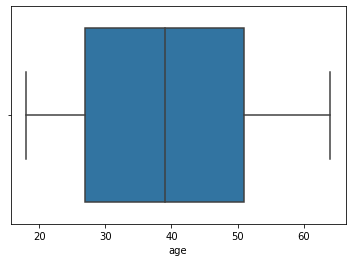

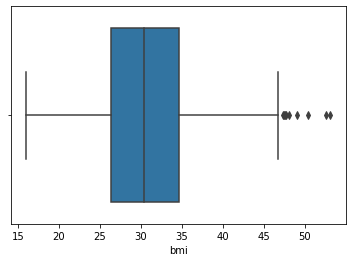

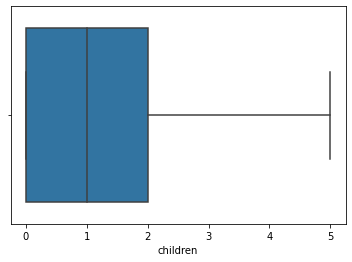

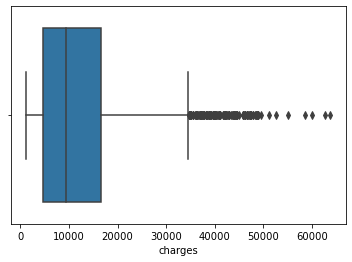

In [8]:
for i in num:
    sns.boxplot(Health_insurance[i])
    plt.show()

### Inter Quartile range(IQR)

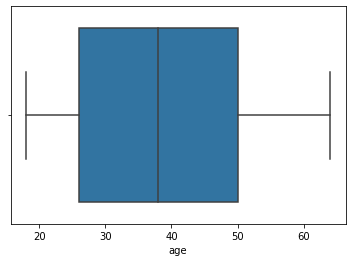

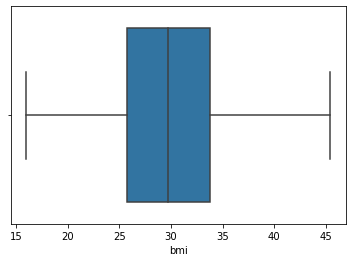

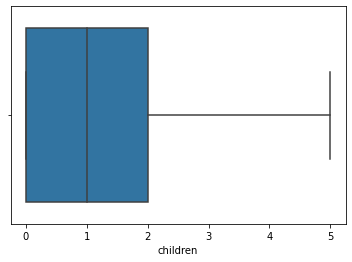

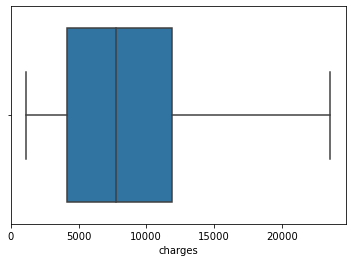

In [55]:
def out(col):
    q1 = Health_insurance[col].quantile(0.25)
    q3 = Health_insurance[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    
    ub = q3+(1.5*IQR)
    
    outliers = Health_insurance[(Health_insurance[col]<lb)|(Health_insurance[col]>ub)].index
    return outliers
for i in num:
    Health_insurance.drop(out(i),inplace=True)
    sns.boxplot(Health_insurance[i])
    plt.show()

In [56]:
import os
os.getcwd()
Health_insurance.to_csv('C:\\Users\\Irfan\\Machine Learning\\Health_insurance.csv')

In [57]:
Health_insurance=pd.read_csv("Health_insurance.csv")
Health_insurance.drop(Health_insurance.filter(regex="Unnamed"),axis=1, inplace=True)
Health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1100,52,female,44.700,3,no,southwest,11411.68500
1101,50,male,30.970,3,no,northwest,10600.54830
1102,18,female,31.920,0,no,northeast,2205.98080
1103,18,female,36.850,0,no,southeast,1629.83350


## Univariate analysis

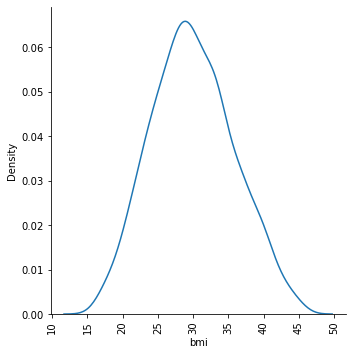

In [58]:
sns.displot(x=Health_insurance['bmi'],data=Health_insurance,kind='kde')
plt.xticks(rotation=90)   
plt.show()

## Observation:
>The density of body mass index is high weights at 20-40 that are relative to height

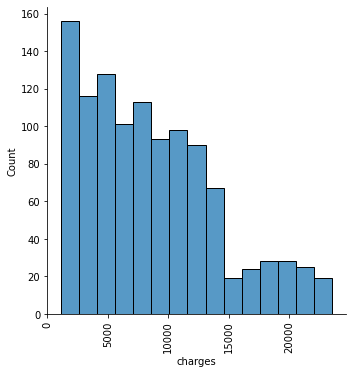

In [59]:
sns.displot(x=Health_insurance['charges'],data=Health_insurance,kind='hist')
plt.xticks(rotation=90)   
plt.show()

## Observation:
>The max charges of count below 5000

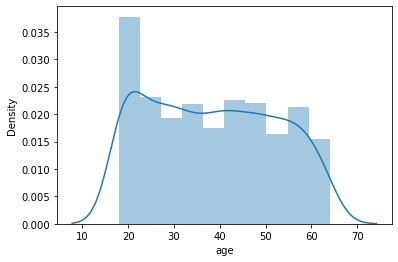

In [60]:
sns.distplot(Health_insurance['age'])
plt.show()

## Observation
>age of primary beneficiary is high dendity in the range 20-30.

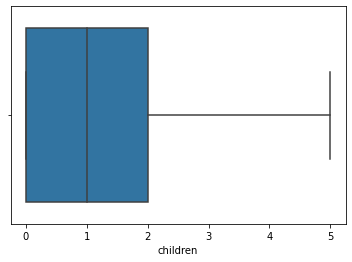

In [61]:
sns.boxplot(Health_insurance['children'])
plt.show()

## Observation:
>Here we observe that there is no outliers in boxplot and first quartile is 0 and third quartile is 2 and the upper bound is 5

## Categorical columns

In [62]:
cat=Health_insurance.select_dtypes(exclude='number')
cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1100,female,no,southwest
1101,male,no,northwest
1102,female,no,northeast
1103,female,no,southeast


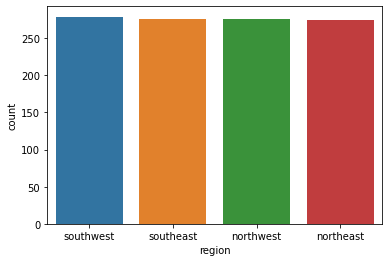

In [63]:
sns.countplot(Health_insurance['region']);

## Observation:
>The count is same in all regions.

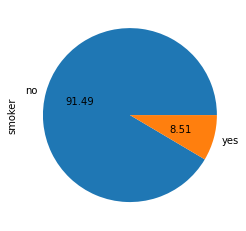

In [64]:
Health_insurance['smoker'].value_counts().plot(kind="pie",autopct="%.2f");

## Observation:
>smoker percentage is less compare to non smoker percentage

## BIVARIATE ANALYSIS

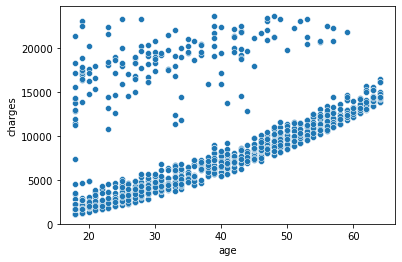

In [65]:
sns.scatterplot(x=Health_insurance['age'],y=Health_insurance['charges'],data=Health_insurance)
plt.show()

## Observation:
>Here if the age is increase the charges also increase.

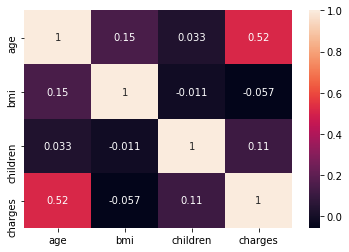

In [66]:
sns.heatmap(Health_insurance.corr(),annot=True)
plt.show()

## Observation:
>here age and charges are mostly have positive correlation.means if the age is increase the charges are also increased.

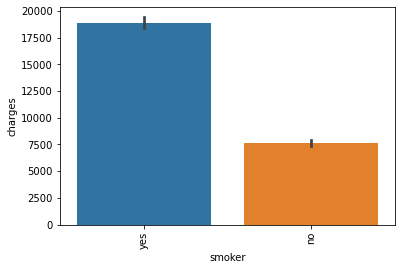

In [67]:
sns.barplot(x=Health_insurance['smoker'],y=Health_insurance['charges'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

## Observation:
>Here we can say that the smoker have most charges.

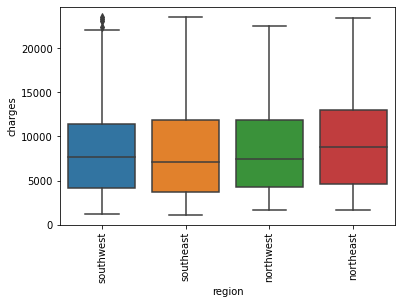

In [68]:
sns.boxplot(x=Health_insurance['region'],y=Health_insurance['charges'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

## Observation:
>Here we can say that northeast region peoples billed more than 20000

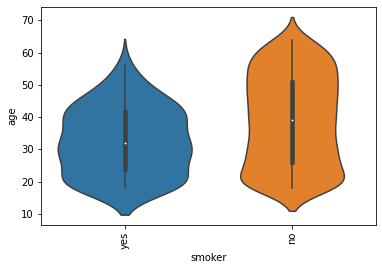

In [69]:
sns.violinplot(x=Health_insurance['smoker'],y=Health_insurance['age'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

## Observation:
>The smoker age high density in the range between 20-40.

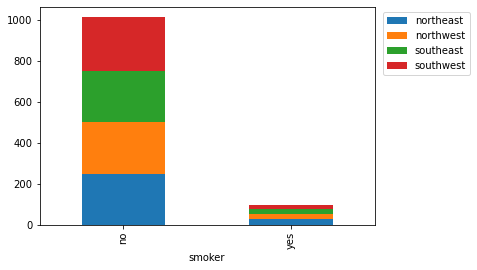

In [70]:
crosstab=pd.crosstab(Health_insurance['smoker'],Health_insurance['region'])
crosstab.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

## Observation:
>Here the smoker are less compare to non smokers region wise.

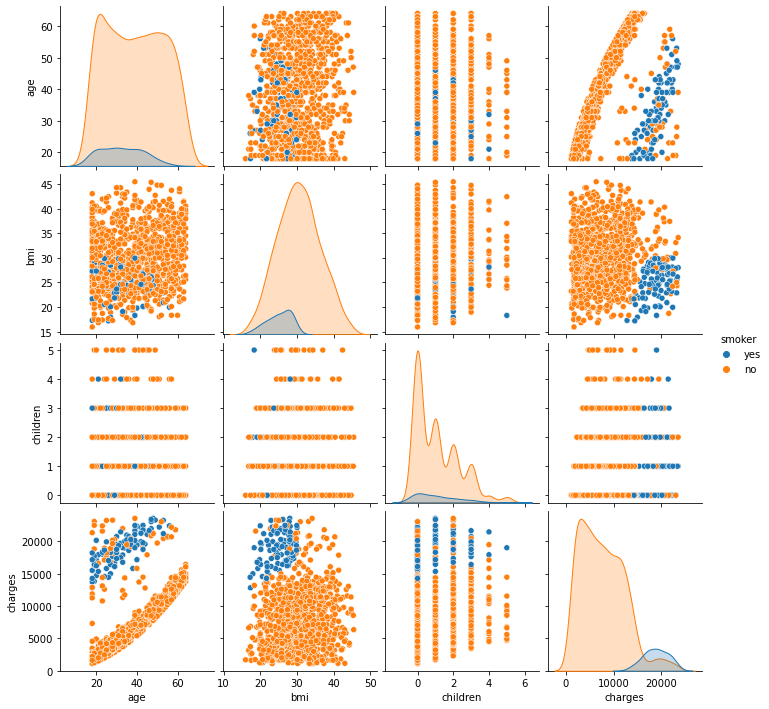

In [71]:
sns.pairplot(data=Health_insurance,hue='smoker')
plt.show()

## Step - 2: Document the below mentioned points properly: 
- Input variables:age,sex,bmi,children,smoker,region
- Target variable:charges
- Type:Supervised Learning(since target variable is given).
- Task:Regression(The target variable is continous or realvalued).
- Identify the Evaluation Metric.
	- regression task - Mean Absolute Error

In [72]:
X=Health_insurance[['age','sex','bmi','children','smoker','region']]
y=Health_insurance['charges']

In [73]:
Health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1105 non-null   int64  
 1   sex       1105 non-null   object 
 2   bmi       1105 non-null   float64
 3   children  1105 non-null   int64  
 4   smoker    1105 non-null   object 
 5   region    1105 non-null   object 
 6   charges   1105 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.6+ KB


## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(828, 6) (828,)
(277, 6) (277,)


### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [107]:
X_train_cat=X_train.select_dtypes(include='object')
X_train_num=X_train.select_dtypes(include=['float64','int64'])
print(X_train_cat.shape,X_train_num.shape)
X_test_cat=X_test.select_dtypes(include='object')
X_test_num=X_test.select_dtypes(include=['float64','int64'])
print(X_test_cat.shape,X_test_num.shape)

(828, 3) (828, 3)
(277, 3) (277, 3)


In [108]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
487,0.602555,-1.726558,-0.045097
666,-1.138355,-0.560836,-0.874876
413,0.312404,-0.641462,-0.874876
614,0.602555,1.033213,-0.045097
542,-0.848203,0.555334,0.784683


In [109]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
487,1.0,0.0,1.0,0.0,0.0
666,1.0,0.0,0.0,1.0,0.0
413,1.0,0.0,0.0,0.0,0.0
614,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,1.0,0.0,0.0


## Cancat traindata

In [110]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
487,0.602555,-1.726558,-0.045097,1.0,0.0,1.0,0.0,0.0
666,-1.138355,-0.560836,-0.874876,1.0,0.0,0.0,1.0,0.0
413,0.312404,-0.641462,-0.874876,1.0,0.0,0.0,0.0,0.0
614,0.602555,1.033213,-0.045097,0.0,0.0,0.0,0.0,1.0
542,-0.848203,0.555334,0.784683,1.0,0.0,1.0,0.0,0.0


### Step - 5: Data preparation on test data:
-   For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [111]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
877,-0.703127,-0.713690,2.444242
602,-1.065817,0.042182,1.614463
1003,-0.848203,0.236189,-0.045097
378,0.747631,1.139035,1.614463
581,-1.501044,0.898836,-0.045097


In [112]:
X_test_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
877,0.0,0.0,0.0,0.0,1.0
602,0.0,0.0,0.0,0.0,1.0
1003,0.0,0.0,1.0,0.0,0.0
378,0.0,0.0,0.0,1.0,0.0
581,1.0,0.0,0.0,1.0,0.0


## Cancat testdata

In [113]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
877,-0.703127,-0.713690,2.444242,0.0,0.0,0.0,0.0,1.0
602,-1.065817,0.042182,1.614463,0.0,0.0,0.0,0.0,1.0
1003,-0.848203,0.236189,-0.045097,0.0,0.0,1.0,0.0,0.0
378,0.747631,1.139035,1.614463,0.0,0.0,0.0,1.0,0.0
581,-1.501044,0.898836,-0.045097,1.0,0.0,0.0,1.0,0.0


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- Linear Regression
- KNN
- Support Vector Machines
- Decision Trees
- Random Forest
### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. 
### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. 
>Write your conclusion on the best algorithm for the Medical Cost Prediction problem.



### Linear Regression

#### Training

In [114]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

#### Prediction

In [115]:
y_test_pred = regressor.predict(X_test_transformed)

#### Evaluation

In [116]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1559.224829723888

<AxesSubplot:xlabel='charges', ylabel='Count'>

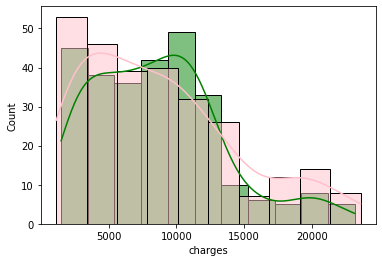

In [117]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Training-KNN Regression

In [118]:
from sklearn.neighbors import KNeighborsRegressor
KNN_regression=KNeighborsRegressor()
KNN_regression.fit(X_train_transformed,y_train)
y_test_pred=KNN_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2240.7913134288815

<AxesSubplot:xlabel='charges', ylabel='Count'>

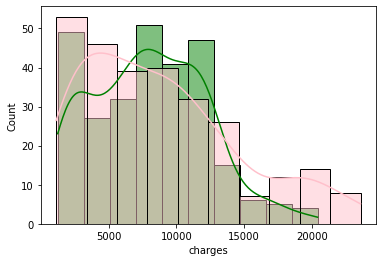

In [119]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Training-Support vector Regression

In [120]:
from sklearn.svm import SVR
SV_regression=SVR()
SV_regression.fit(X_train_transformed,y_train)
y_test_pred=SV_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4555.766490600006

<AxesSubplot:xlabel='charges', ylabel='Count'>

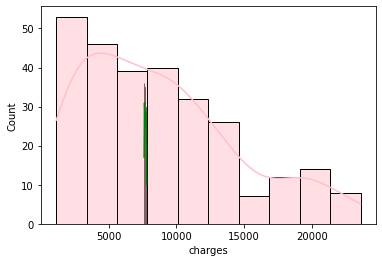

In [121]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Training-Decision Tree Regression

In [122]:
from sklearn.tree import DecisionTreeRegressor
DT_regression=DecisionTreeRegressor()
DT_regression.fit(X_train_transformed,y_train)
y_test_pred=DT_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1703.9293323826716

<AxesSubplot:xlabel='charges', ylabel='Count'>

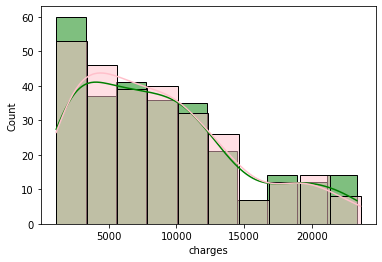

In [123]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

## Ensemble

### Training-Random Forest Regression

In [124]:
from sklearn.ensemble import RandomForestRegressor
Random_regression=RandomForestRegressor()
Random_regression.fit(X_train_transformed,y_train)
y_test_pred=Random_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1616.7197979090681

<AxesSubplot:xlabel='charges', ylabel='Count'>

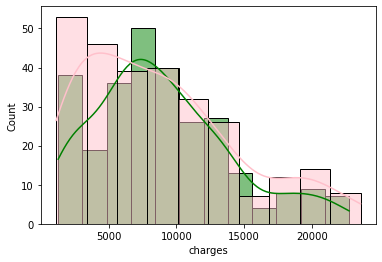

In [125]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

## Training-Adaboost Regression

In [126]:
from sklearn.ensemble import AdaBoostRegressor
ADA_regression=AdaBoostRegressor()
ADA_regression.fit(X_train_transformed,y_train)
y_test_pred=ADA_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2671.570956218037

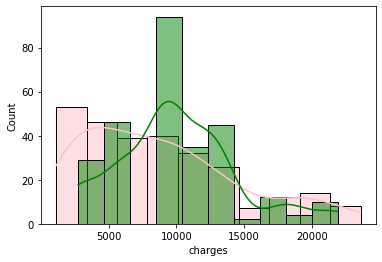

In [127]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

## Training-Gradiant boost decision tree Regression¶

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_regression=GradientBoostingRegressor()
GBDT_regression.fit(X_train_transformed,y_train)
y_test_pred=GBDT_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1482.5248766148618

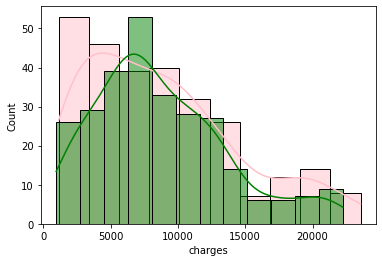

In [129]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

In [158]:
conc=pd.DataFrame({'Linear Regression':1499.283748485613,'KNN Regression':1979.7082227126355,'Support vector Regression':4470.67965087522,
                 'Decision Tree Regression':1915.541095270758,'Random Forest Regression':1493.599557296288,'Adaboost Regression':3157.15780852512,
                 'Gradiant boost decision tree Regression':1448.489727349152},index=['Mean Absolute Error'])

In [164]:
conc.T

,Mean Absolute Error
Linear Regression,1499.283748
KNN Regression,1979.708223
Support vector Regression,4470.679651
Decision Tree Regression,1915.541095
Random Forest Regression,1493.599557
Adaboost Regression,3157.157809
Gradiant boost decision tree Regression,1448.489727


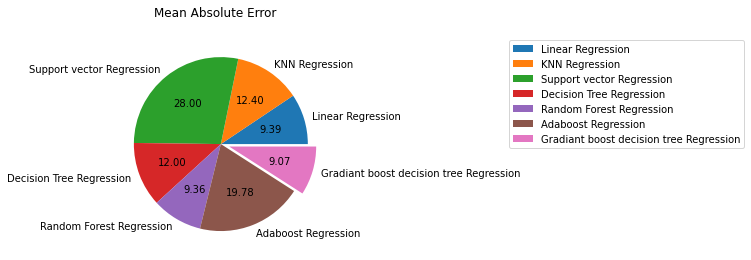

In [187]:
conc.T.plot(kind='pie',subplots=True,explode=[0,0,0,0,0,0,0.1],title='Mean Absolute Error',ylabel=' ',autopct='%.2f')
plt.legend(bbox_to_anchor=(1.8,1));

## Conclusion:
- Gradiant boost decision tree Regression algorithm is the best model for Medical Cost Prediction
- Becuase Gradiant boost decision tree Regression mean absolute error is less compare to the other models .
